<a href="https://colab.research.google.com/github/Jaimon12/Crimes-Against-Women/blob/main/Crimes_Against_Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Exploratory Analysis of the Crimes against Women in India***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet # fbprophet is deprecated, prophet is used now
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load the dataset
crimes_df = pd.read_csv('CrimesOnWomenData.csv')
desc_df = pd.read_csv('description.csv')

In [ ]:
# Display dataset information
print(crimes_df.info())
print(crimes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB
None
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   

In [ ]:
# Check for missing values
print("Missing Values:\n", crimes_df.isnull().sum())

Missing Values:
 Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


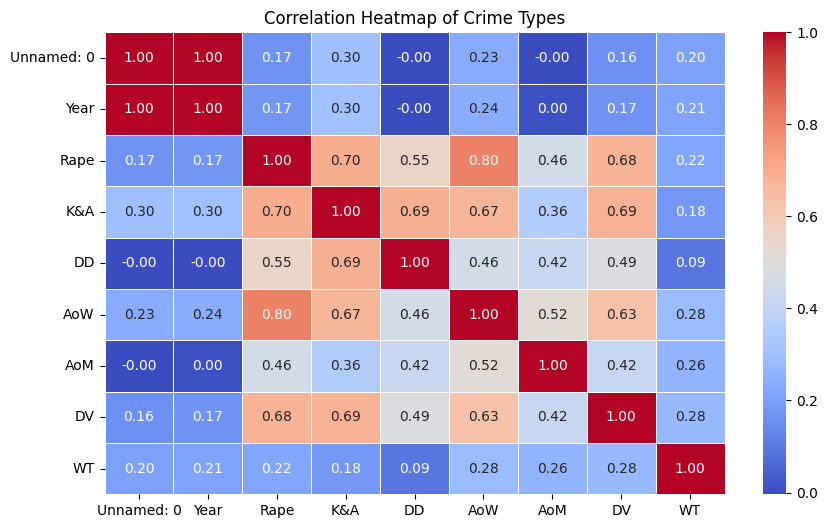

In [ ]:
# Compute the correlation matrix
plt.figure(figsize=(10, 6))
# Include numeric_only=True to consider only numerical columns for correlation
correlation_matrix = crimes_df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Crime Types")
plt.show()


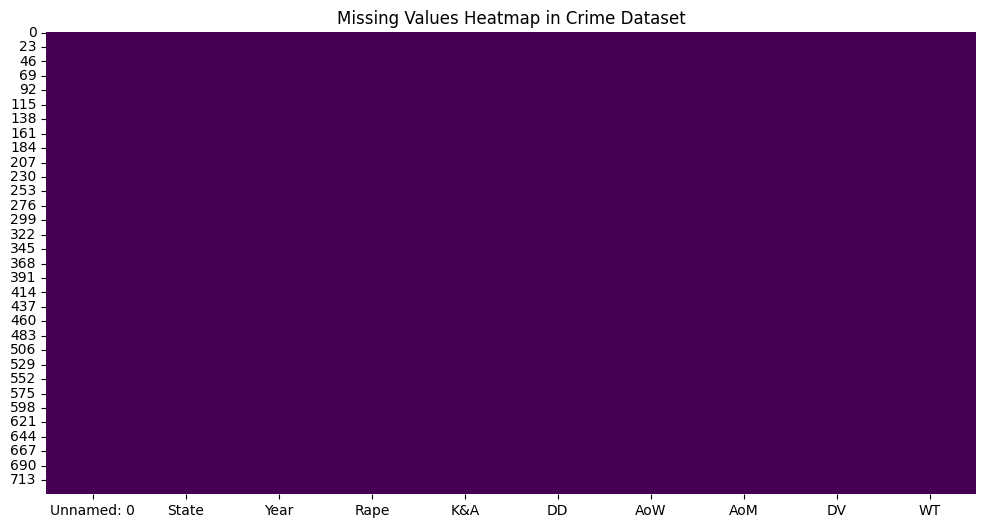

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(crimes_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap in Crime Dataset")
plt.show()


In [ ]:
# Convert Year column to datetime format
crimes_df['Year'] = pd.to_datetime(crimes_df['Year'], format='%Y')

In [ ]:
# Aggregating crime data by year
yearly_crime_data = crimes_df.groupby('Year').sum().reset_index()

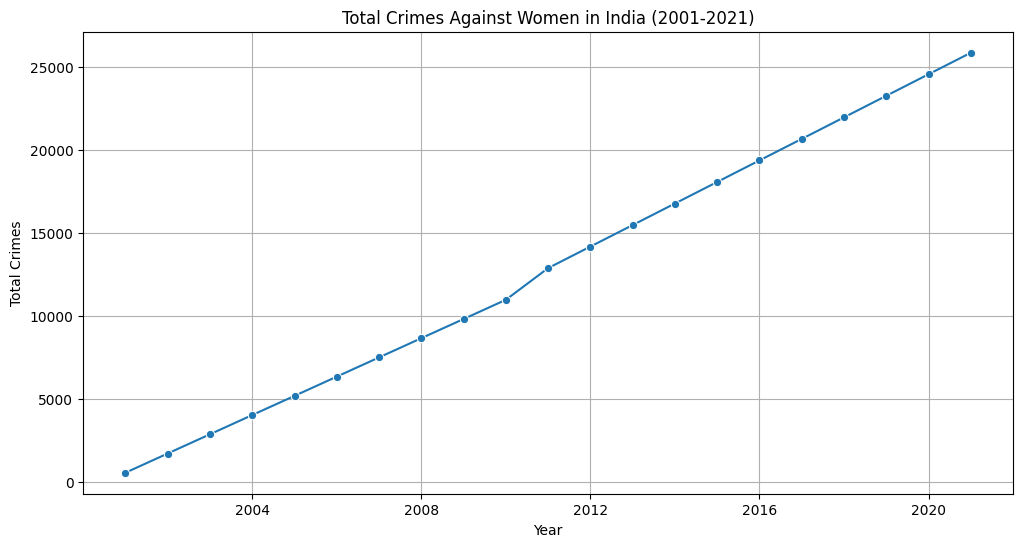

In [ ]:
# Aggregating crime data by year
yearly_crime_data = crimes_df.groupby('Year').sum().reset_index()
# Rename the 'Unnamed: 0' column (which likely contains Total Crimes after sum)
yearly_crime_data = yearly_crime_data.rename(columns={'Unnamed: 0': 'Total Crimes'})
# Plot total crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crime_data, x="Year", y="Total Crimes", marker='o')
plt.title("Total Crimes Against Women in India (2001-2021)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()

In [ ]:
pd.Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], dtype='object')


Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

<ipython-input-12-8abd693d874f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="Reds_r")


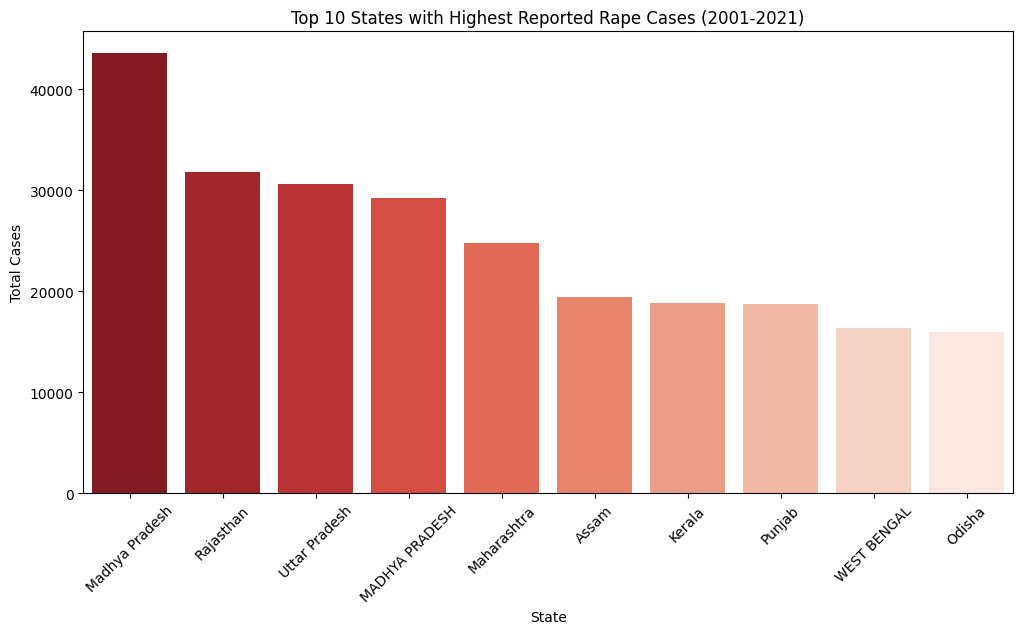

In [ ]:
# Aggregating crime data by state
top_states = crimes_df.groupby("State")["Rape"].sum().sort_values(ascending=False).head(10)

# Plot the top states with the highest reported rape cases
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 States with Highest Reported Rape Cases (2001-2021)")
plt.ylabel("Total Cases")
plt.show()


In [ ]:
# Predictive Modeling with Facebook Prophet
prophet_df = yearly_crime_data[['Year', 'Total Crimes']].rename(columns={'Year': 'ds', 'Total Crimes': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdlr3gxkr/9d3zc26_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdlr3gxkr/triz_i18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72267', 'data', 'file=/tmp/tmpdlr3gxkr/9d3zc26_.json', 'init=/tmp/tmpdlr3gxkr/triz_i18.json', 'output', 'file=/tmp/tmpdlr3gxkr/prophet_model5wdqzc4w/prophet_model-20250227073220.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:32:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
# Create future dataframe
future = prophet_model.make_future_dataframe(periods=5, freq='Y')
forecast = prophet_model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


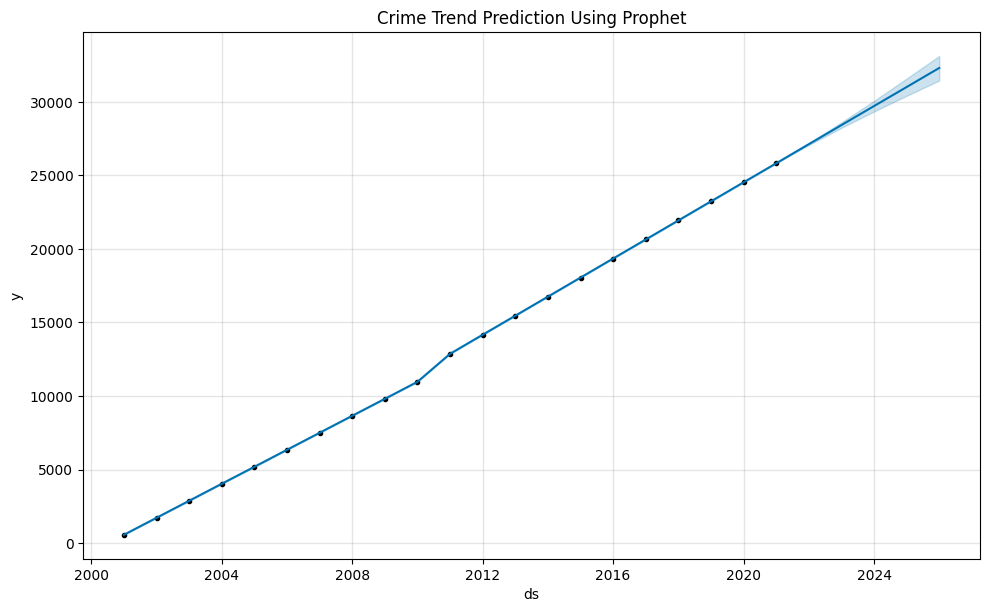

In [ ]:
# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Crime Trend Prediction Using Prophet")
plt.show()

In [ ]:
# Preparing data for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(yearly_crime_data['Total Crimes'].values.reshape(-1,1))

In [ ]:
X_train, y_train = [], []
time_step = 3  # Using 3 years for training
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2790
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7563e-04
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2693e-04
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0849e-04
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5396e-04
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5180e-04
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6109e-04
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7958e-04
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9920e-04
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2653e-04
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3

In [ ]:
# Predict next 5 years
future_years = np.arange(2022, 2027).reshape(-1,1)
scaled_future = scaler.transform(future_years)

X_test = []
for i in range(len(scaled_future)):
    X_test.append(scaled_data[-time_step:].flatten())
    scaled_data = np.append(scaled_data, scaled_future[i]).reshape(-1, 1)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_crimes = model.predict(X_test)
predicted_crimes = scaler.inverse_transform(predicted_crimes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


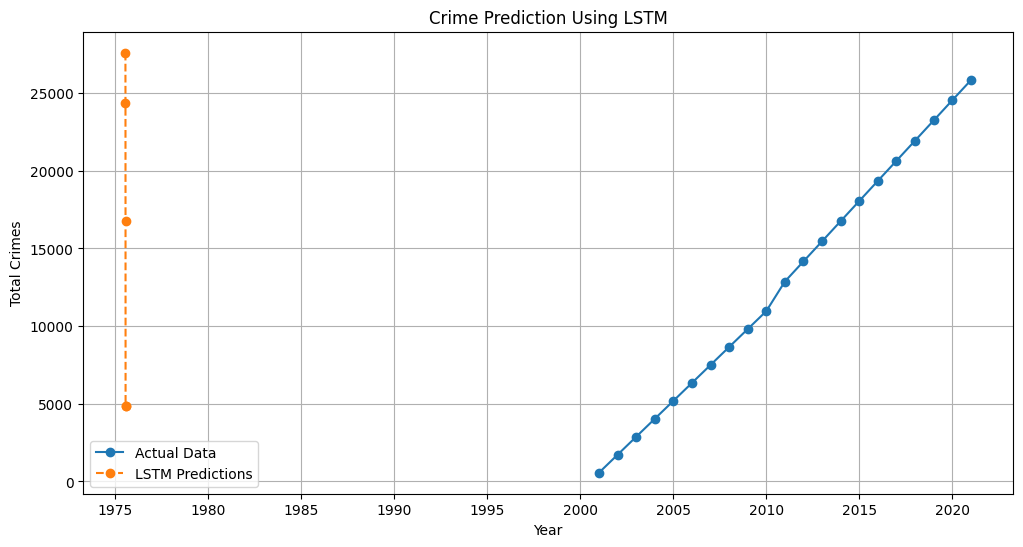

In [ ]:
# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(yearly_crime_data['Year'], yearly_crime_data['Total Crimes'], label="Actual Data", marker='o')
plt.plot(future_years, predicted_crimes, label="LSTM Predictions", marker='o', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.title("Crime Prediction Using LSTM")
plt.grid(True)
plt.show()

# ***Linear Regression and Decision Tree Regressor for Crime Prediction***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Preparing Data for Linear Regression
yearly_crime_data['Year'] = yearly_crime_data['Year'].dt.year  # Convert datetime to integer
X = yearly_crime_data[['Year']]
y = yearly_crime_data['Total Crimes']

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on Test Data
y_pred = lr_model.predict(X_test)


In [ ]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression MSE: {mse}")

Linear Regression MAE: 338.33183446582404
Linear Regression MSE: 171811.4149789773


In [ ]:
# Predict Next 5 Years (2022-2026)
future_years = pd.DataFrame({'Year': np.arange(2022, 2027)})
future_predictions = lr_model.predict(future_years)

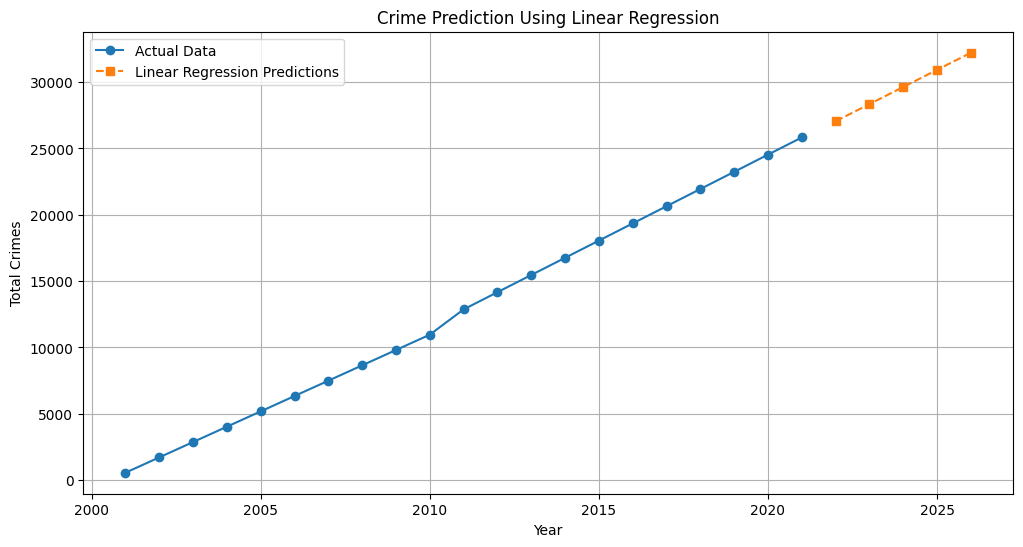

In [ ]:
# Plot Predictions
plt.figure(figsize=(12,6))
plt.plot(yearly_crime_data['Year'], yearly_crime_data['Total Crimes'], label="Actual Data", marker='o')
plt.plot(future_years, future_predictions, label="Linear Regression Predictions", marker='s', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.title("Crime Prediction Using Linear Regression")
plt.grid(True)
plt.show()

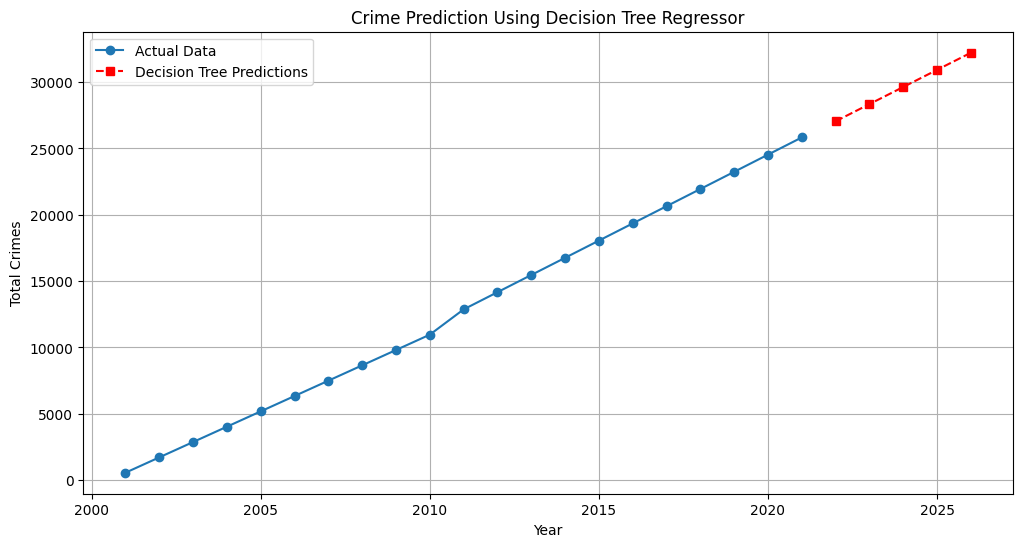

In [ ]:
# Plot Predictions
plt.figure(figsize=(12,6))
plt.plot(yearly_crime_data['Year'], yearly_crime_data['Total Crimes'], label="Actual Data", marker='o')
plt.plot(future_years, future_predictions, label="Decision Tree Predictions", marker='s', linestyle='dashed', color='red')
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.title("Crime Prediction Using Decision Tree Regressor")
plt.grid(True)
plt.show()